# Monthly Data
- 호주 당뇨병 치료약(anti-diabetic) 월별 Sales 데이터 사용 예정 
https://raw.githubusercontent.com/selva86/datasets/master/a10.csv
- 모든 회사에 있는 월별 매출, 가입자, 등 실적 데이터에 활용

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

- 데이터 불러오기. plottig. 

- 계절요인 분리. Trend, Seasonl, residual을 포함하는 테이블 생성. 
- Insight 도출
  1. 월평균 성장율 
  2. Seasonal 요소 분석
  3. residual 증감 여부 

In [28]:
# 데이터 로딩
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


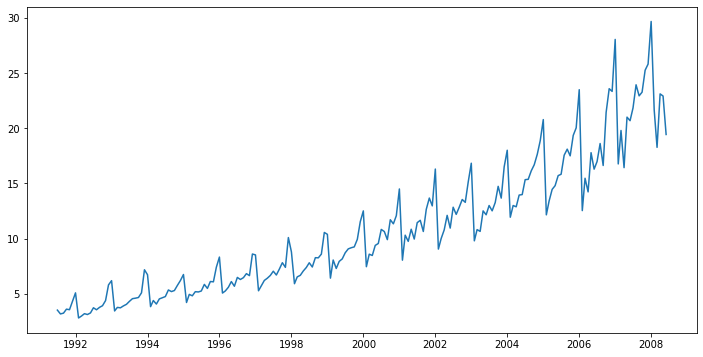

In [29]:
# 시각화
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df.value)

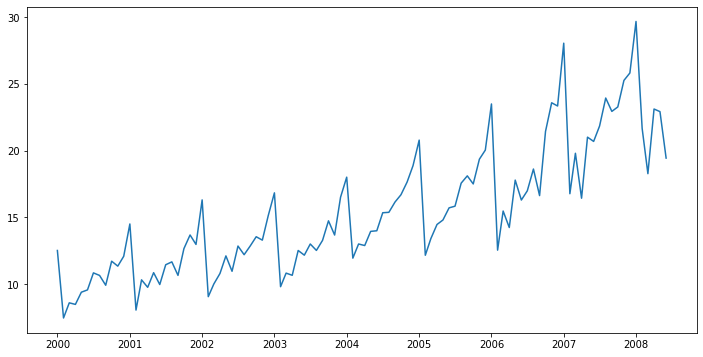

In [30]:
# 인덱스 범위재설정 후 시각화
df=df[df.index>'1999-12-31']
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(df.value)

In [31]:
# seasonal_decompose메서드 사용
result= seasonal_decompose(df, model='additive', two_sided=False)

<Figure size 864x360 with 0 Axes>

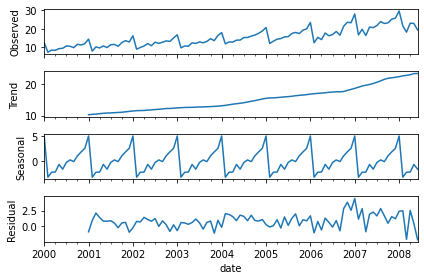

In [40]:
result.plot()
plt.show()

In [43]:
df_re=pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)

In [44]:
df_re.columns=['obs', 'trend', 'seasonal', 'resid']
df_re.dropna(inplace=True)

In [45]:
df_re.head(24)
df_re['year']=df_re.index.year

In [46]:
df_re.head()

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001


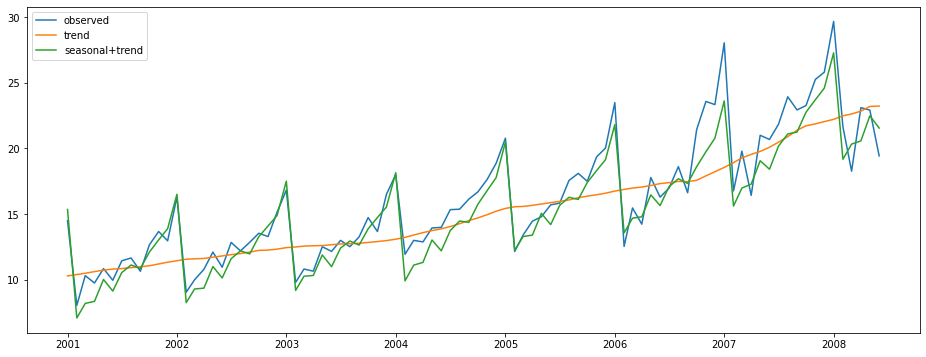

In [47]:
plt.figure(figsize=(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()
# 2006년 2007년에는 ordinary한 cycle에서 벗어나는 경향이 있다. (residual 크다. )

In [48]:
df_re.index[0]
def get_date(date):
  return (str(date.year)+'-'+str(date.month))



In [49]:
get_date(df_re.index[0])

'2001-1'

[Text(0, 0, '2001-1'),
 Text(0, 0, '2001-2'),
 Text(0, 0, '2001-3'),
 Text(0, 0, '2001-4'),
 Text(0, 0, '2001-5'),
 Text(0, 0, '2001-6'),
 Text(0, 0, '2001-7'),
 Text(0, 0, '2001-8'),
 Text(0, 0, '2001-9'),
 Text(0, 0, '2001-10'),
 Text(0, 0, '2001-11'),
 Text(0, 0, '2001-12'),
 Text(0, 0, '2002-1'),
 Text(0, 0, '2002-2'),
 Text(0, 0, '2002-3'),
 Text(0, 0, '2002-4'),
 Text(0, 0, '2002-5'),
 Text(0, 0, '2002-6'),
 Text(0, 0, '2002-7'),
 Text(0, 0, '2002-8'),
 Text(0, 0, '2002-9'),
 Text(0, 0, '2002-10'),
 Text(0, 0, '2002-11'),
 Text(0, 0, '2002-12'),
 Text(0, 0, '2003-1'),
 Text(0, 0, '2003-2'),
 Text(0, 0, '2003-3'),
 Text(0, 0, '2003-4'),
 Text(0, 0, '2003-5'),
 Text(0, 0, '2003-6'),
 Text(0, 0, '2003-7'),
 Text(0, 0, '2003-8'),
 Text(0, 0, '2003-9'),
 Text(0, 0, '2003-10'),
 Text(0, 0, '2003-11'),
 Text(0, 0, '2003-12'),
 Text(0, 0, '2004-1'),
 Text(0, 0, '2004-2'),
 Text(0, 0, '2004-3'),
 Text(0, 0, '2004-4'),
 Text(0, 0, '2004-5'),
 Text(0, 0, '2004-6'),
 Text(0, 0, '2004-7'),
 T

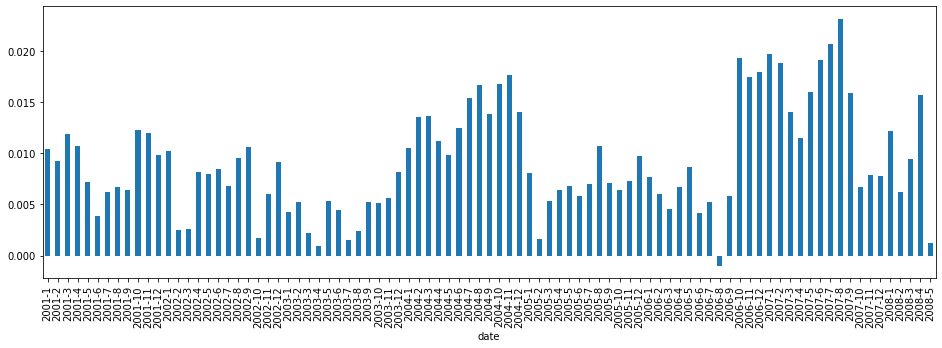

In [50]:
# trend
ax=df_re.trend.pct_change().dropna().plot(kind='bar', figsize=(16,5))
ax.set_xticklabels(list(map(lambda x: get_date(x), df_re.index  )))

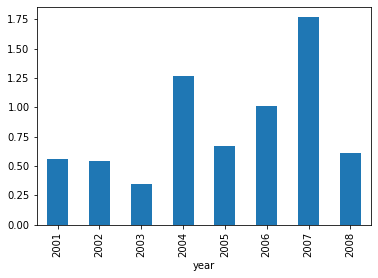

In [51]:
# residual : unexpected 값들이다.
df_re.groupby('year')['resid'].mean().plot(kind='bar')
